In [404]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("paperxd/all-computer-prices")

print("Path to dataset files:", path)

Path to dataset files: /Users/joseborges/.cache/kagglehub/datasets/paperxd/all-computer-prices/versions/1


In [405]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_features - 1)) / ((len(y_true) - n_features - 1))
    return adjusted_r2

def print_errors(actual, pred, n_feat):
  print("\tR2: " + str(r2_score(actual, pred)))
  print("\tAdjusted R2: " + str(adjusted_r2_score(actual, pred, n_feat)))
  print("\tMSE: " + str(mean_squared_error(actual, pred)))
  print("\tMAE: " + str(mean_absolute_error(actual, pred)))

In [407]:
path

'/Users/joseborges/.cache/kagglehub/datasets/paperxd/all-computer-prices/versions/1'

In [408]:
print(os.listdir(path))

['computer_prices_all.csv']


In [409]:
csv_path = f"{path}/computer_prices_all.csv"
df = pd.read_csv(csv_path)

In [410]:
df.head(10)

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
5,Desktop,MSI,MSI Think KSG,2025,Windows,ATX,Intel,Intel i7-10369,5,16,...,2560x1440,90,0,0,1000,Wi-Fi 5,5.0,9.00,36,2751.99
6,Desktop,Apple,Apple Arena R5Q,2024,Windows,ATX,Apple,Apple M2,2,6,...,2560x1440,60,0,0,850,Wi-Fi 6,5.1,9.00,24,1609.99
7,Desktop,Apple,Apple Station EWP,2023,Windows,Micro-ATX,Apple,Apple M2 Pro,3,8,...,2560x1440,60,0,0,650,Wi-Fi 6,5.0,8.00,12,2139.99
8,Laptop,Dell,Dell Creator GIQ,2024,Windows,Mainstream,Intel,Intel i9-14473,6,26,...,2560x1600,60,80,240,0,Wi-Fi 5,5.0,1.17,48,2953.99
9,Laptop,Lenovo,Lenovo Blade MIZ,2025,Windows,Ultrabook,AMD,AMD Ryzen 3 4374,1,4,...,3840x2160,120,60,45,0,Wi-Fi 6,5.3,1.50,24,1653.99


# EDA

To make the EDA easier, we will use ProfileReport

In [411]:
from ydata_profiling import ProfileReport

In [412]:
computer_report = ProfileReport(df)

In [413]:
computer_report.to_file('computer_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 33/33 [00:00<00:00, 77.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Checking for duplicates

In [414]:
df.duplicated().sum()

0

Checking for Na values

In [415]:
df.isna().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [416]:
numerical_cols = df_1.select_dtypes(include=['int64', 'float64']).columns

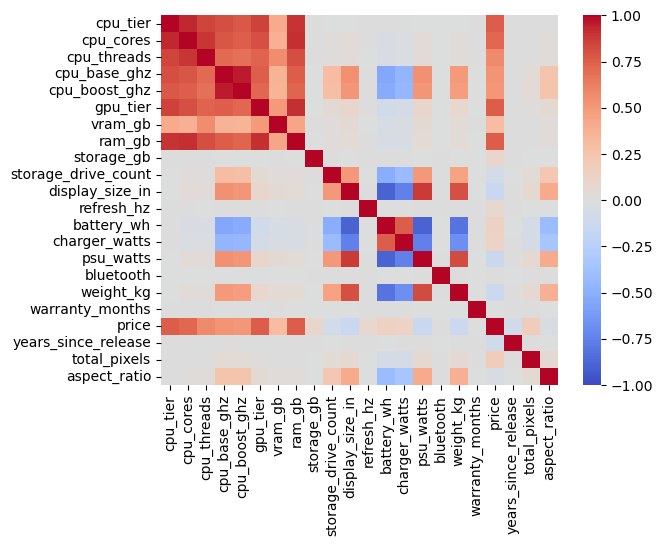

In [417]:
sns.heatmap(df_1[numerical_cols].corr(), cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [418]:
corr_matrix = df_1[numerical_cols].corr()
corr_series = corr_matrix.unstack()
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]
corr_series = corr_series.abs().sort_values(ascending=False)
corr_series = corr_series[~corr_series.index.duplicated(keep='first')]
corr_df = pd.DataFrame(corr_series).reset_index()
corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation']

In [419]:
corr_df

,Feature_1,Feature_2,Correlation
0,cpu_base_ghz,cpu_boost_ghz,0.960884
1,cpu_boost_ghz,cpu_base_ghz,0.960884
2,cpu_tier,cpu_cores,0.937376
3,cpu_cores,cpu_tier,0.937376
4,ram_gb,gpu_tier,0.912918
...,...,...,...
457,warranty_months,cpu_threads,0.000063
458,warranty_months,cpu_cores,0.000015
459,cpu_cores,warranty_months,0.000015
460,warranty_months,cpu_tier,0.000008


In [420]:
corr_df[corr_df['Correlation'] >= 0.85]

,Feature_1,Feature_2,Correlation
0,cpu_base_ghz,cpu_boost_ghz,0.960884
1,cpu_boost_ghz,cpu_base_ghz,0.960884
2,cpu_tier,cpu_cores,0.937376
3,cpu_cores,cpu_tier,0.937376
4,ram_gb,gpu_tier,0.912918
5,gpu_tier,ram_gb,0.912918
6,ram_gb,cpu_cores,0.906770
7,cpu_cores,ram_gb,0.906770
8,ram_gb,cpu_tier,0.899349
9,cpu_tier,ram_gb,0.899349


# Feature Engineering

For the release year column, I will replace it for a years_since_release column
I will copy the original df to keep it intact 

In [421]:
df_1 = df.copy()

In [422]:
df_1['years_since_release'] = 2025 - df_1['release_year']

In [423]:
df_1.drop(columns='release_year', inplace = True)

In [424]:
df_1[['cpu_model', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz']][df_1["cpu_model"] == 'Intel i5-11129']

,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz
0,Intel i5-11129,3,12,24,2.8,3.8
3396,Intel i5-11129,3,10,20,2.4,3.4
7908,Intel i5-11129,2,6,12,2.2,3.3
22442,Intel i5-11129,2,6,10,2.6,3.7
25317,Intel i5-11129,3,8,16,2.4,3.3
27441,Intel i5-11129,3,8,14,2.4,3.5
54284,Intel i5-11129,3,10,20,2.4,3.2
66442,Intel i5-11129,3,8,16,2.4,3.3
69765,Intel i5-11129,3,8,16,2.4,3.5
70069,Intel i5-11129,2,8,16,2.2,3.1


After checking this example, I noticed that the cpu_model column might not be significant for our model, so we will drop this column. We can asume the same for the gpu_model column. The other cpu and gpu columns already capture the specifications.

I will also remove the general model column

In [425]:
df_1.drop(columns=['cpu_model','gpu_model'], inplace=True)
df_1.drop(columns=['model'], inplace=True)

Checking for all the categorical columns left 

In [426]:
categorical_cols = df_1.select_dtypes(include=["object", "category"]).columns
categorical_cols

Index(['device_type', 'brand', 'os', 'form_factor', 'cpu_brand', 'gpu_brand',
       'storage_type', 'display_type', 'resolution', 'wifi'],
      dtype='object')

The resolution can be broken down into width and height

In [427]:
df_1[['width', 'height']] = df_1['resolution'].str.split('x', expand=True).astype(int)

Now we can drop the resolution column

In [428]:
df_1.drop(columns='resolution', inplace=True)

Using these two numbers we can create two new columns, total_pixels and aspect_ratio 

In [429]:
df_1['total_pixels'] = df_1['width'] * df_1['height']
df_1['aspect_ratio'] = df_1['width'] / df_1['height']

Now we drop the width and height columns

In [430]:
df_1.drop(columns=['width', 'height'], inplace=True)

The bluetooth feature also acts as a categorical value 

In [527]:
df_1['bluetooth'].value_counts()

bluetooth
5.2    28065
5.0    25980
5.1    21951
5.3    18065
4.2     5939
Name: count, dtype: int64

In [702]:
df_1['bluetooth'] = df_1['bluetooth'].astype(str)

In [704]:
df_1_enhanced = df_1.copy()

Now we add some extra features

In [760]:
# Some feature engineering
df_1_enhanced["performance_per_core"] = df_1_enhanced["cpu_base_ghz"] * df_1_enhanced["cpu_cores"]
df_1_enhanced["boost_per_core"] = df_1_enhanced["cpu_boost_ghz"] * df_1_enhanced["cpu_cores"]
df_1_enhanced["ram_per_core"] = df_1_enhanced["ram_gb"] / df_1_enhanced["cpu_cores"].replace(0, np.nan)
df_1_enhanced["storage_per_drive"] = df_1_enhanced["storage_gb"] / df_1_enhanced["storage_drive_count"].replace(0, np.nan)
df_1_enhanced["battery_efficiency"] = df_1_enhanced["battery_wh"] / df_1_enhanced["weight_kg"].replace(0, np.nan)
df_1_enhanced["ppi"] = (df_1_enhanced["total_pixels"] ** 0.5) / df_1_enhanced["display_size_in"].replace(0, np.nan)

# extras
df_1_enhanced["total_performance_tier"] = df_1_enhanced["cpu_tier"] + df_1_enhanced["gpu_tier"]
df_1_enhanced["performance_age_ratio"] = (df_1_enhanced["cpu_boost_ghz"] * df_1_enhanced["cpu_cores"]) / (1 + df_1_enhanced["years_since_release"])

# replace inf/nan if division by zero
df_1_enhanced.replace([np.inf, -np.inf], np.nan, inplace=True)
df_1_enhanced.fillna(0, inplace=True)

For the rest of these columns, we can onehot encode

In [882]:
categorical_cols = df_1.select_dtypes(include=["object", "category"]).columns

In [883]:
categorical_cols

Index(['device_type', 'brand', 'os', 'form_factor', 'cpu_brand', 'gpu_brand',
       'storage_type', 'display_type', 'wifi', 'bluetooth'],
      dtype='object')

First we create our train and test 

In [761]:
X = df_1_enhanced.drop(columns='price')

In [762]:
y = df_1_enhanced['price']

In [763]:
y.skew()

0.9866439454826036

In [764]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [765]:
skew_values = X[num_cols].skew().sort_values(ascending=False)
skew_values

performance_age_ratio     2.620103
storage_per_drive         2.589960
aspect_ratio              2.583353
storage_gb                2.304037
storage_drive_count       1.540038
performance_per_core      1.310186
total_pixels              1.280549
boost_per_core            1.263594
weight_kg                 1.180902
cpu_threads               1.125744
cpu_cores                 1.087762
refresh_hz                1.085829
ram_gb                    1.049278
charger_watts             0.855735
ppi                       0.821556
warranty_months           0.775813
psu_watts                 0.765531
display_size_in           0.666184
years_since_release       0.479062
ram_per_core              0.294704
gpu_tier                  0.285752
vram_gb                   0.281362
total_performance_tier    0.243241
battery_efficiency        0.214115
cpu_tier                  0.174307
cpu_base_ghz              0.172064
cpu_boost_ghz             0.149925
battery_wh               -0.127919
dtype: float64

In [766]:
num_cols

Index(['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz',
       'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb', 'storage_drive_count',
       'display_size_in', 'refresh_hz', 'battery_wh', 'charger_watts',
       'psu_watts', 'weight_kg', 'warranty_months', 'years_since_release',
       'total_pixels', 'aspect_ratio', 'performance_per_core',
       'boost_per_core', 'ram_per_core', 'storage_per_drive',
       'battery_efficiency', 'ppi', 'performance_age_ratio',
       'total_performance_tier'],
      dtype='object')

In [767]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

We proceed to One Hot Encode

In [768]:
encoder = OneHotEncoder(drop='first')
encoded_train = encoder.fit_transform(X_train[categorical_cols]).toarray()
encoded_test = encoder.transform(X_test[categorical_cols]).toarray()

In [769]:
df_transformed_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out())
df_transformed_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out())

In [770]:
X_train_encoded = pd.concat([X_train.drop(columns=categorical_cols).reset_index(), df_transformed_train], axis=1).drop(columns='index')
X_test_encoded = pd.concat([X_test.drop(columns=categorical_cols).reset_index(), df_transformed_test], axis=1).drop(columns='index')

In [771]:
X_train_encoded

,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,...,display_type_OLED,display_type_QLED,display_type_VA,wifi_Wi-Fi 6,wifi_Wi-Fi 6E,wifi_Wi-Fi 7,bluetooth_5.0,bluetooth_5.1,bluetooth_5.2,bluetooth_5.3
0,3,8,16,2.4,3.3,3,8,32,512,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,4,8,2.0,2.8,1,4,8,2048,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8,16,2.4,3.2,2,6,16,256,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,6,6,2.2,3.0,1,0,16,512,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2,8,8,2.2,3.1,1,4,24,512,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,4,12,24,3.0,4.0,4,0,72,256,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
79996,1,4,8,2.0,3.0,1,4,8,512,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
79997,1,6,12,2.0,3.0,1,4,8,256,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
79998,4,12,24,3.0,3.9,5,12,64,512,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [772]:
scaler = StandardScaler()

In [773]:
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

In [774]:
X_train_scaled[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Applying some models

In [836]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


In [839]:
models = {
    'lin': {
        'model': LinearRegression(), 
        'scaled': True, 
        'params': {}
    },
    'gb': {
        'model': GradientBoostingRegressor(),
        'scaled': False,
        'params': {'n_estimators': [100, 300], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'subsample': [0.8, 1.0]
        }
    },
    'dt': {
        'model': DecisionTreeRegressor(),
        'scaled': False,
        'params': {'max_depth': [7, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]
        }
    },
    'rf': {
        'model': RandomForestRegressor(),
        'scaled': False,
        'params': {'max_depth': [7, 10, 15], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]
        }
    },
    'xgb': {
        'model': XGBRegressor(n_jobs=-1),
        'scaled': False,
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.03, 0.1, 0.3], 'max_depth': [3, 5, 7, 10], 'subsample': [0.7, 1.0], 'colsample_bytree': [0.7, 1.0]
        }
    },
    'lgbm': {
        'model': LGBMRegressor(random_state=42),
        'scaled': False,  
        'params': {'n_estimators': [300, 500], 'max_depth': [5, 10], 'learning_rate': [0.05, 0.1], 'num_leaves': [31, 63], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]   
        }
    }  
}

In [ ]:
final_models = []

for name, details in models.items():
    gscv = GridSearchCV(details['model'], details['params'], cv=3, scoring='r2', n_jobs=-1)
    X_train_final = X_train_scaled
    if details['scaled'] == True:
        X_train_final = X_train_scaled
        X_test_final = X_test_scaled
    else:
        X_train_final = X_train_encoded
        X_test_final = X_test_encoded
    gscv.fit(X_train_final, y_train)

    final_models.append({
    'model': name,
    'train_score': gscv.score(X_train_final, y_train),
    'test_score': gscv.score(X_test_final, y_test),
    'best_score': gscv.best_score_,
    'best_params': gscv.best_params_})

In [844]:
final_models_df = pd.DataFrame(final_models)
final_models_df

,model,train_score,test_score,best_score,best_params
0,lin,0.849647,0.876110,0.849398,{}
1,gb,0.861897,0.881345,0.853303,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
2,dt,0.819438,0.813847,0.780611,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
3,rf,0.914443,0.850325,0.821425,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_..."
4,xgb,0.857855,0.879926,0.852206,"{'colsample_bytree': 1.0, 'learning_rate': 0.1..."
5,lgbm,0.873048,0.881248,0.853240,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."


Lets try to find the best hyper parameters for XGB

In [842]:
param_distributions = {
    'n_estimators': [100, 200, 400, 600],          
    'max_depth': [3, 4, 5, 6, 8, 10],              
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0],                  
    'colsample_bytree': [0.6, 0.8, 1.0],           
    'gamma': [0, 0.1, 0.3, 0.5, 1],                
    'min_child_weight': [1, 3, 5, 7],              
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],     
    'reg_lambda': [0.1, 1, 5, 10, 20],             
    'booster': ['gbtree'],                         
    'tree_method': ['hist'],           
    'random_state': [42]
}

In [816]:
xgb = XGBRegressor()

In [817]:
random_cv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=40,            
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [818]:
random_cv.fit(X_train_encoded, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 400, 600],
                                        'random_state': [42],
                                        'reg_alpha': [0, 0.001, 0.01, 0.1, 1,
                                                      10],
                                        'reg_lambda': [0.1, 1, 5, 10, 20],
                                        'subsample': [0.6, 0.8, 1.0],
                                        'tree_method': ['hist']},
                   random_state=42, scoring='r2', verbose=2)

In [819]:
print("Best parameters:", random_cv.best_params_)
print("Best cross-val R2:", random_cv.best_score_)

Best parameters: {'tree_method': 'hist', 'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 600, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8, 'booster': 'gbtree'}
Best cross-val R2: 0.8545054487382707


In [820]:
xgb = XGBRegressor(**random_cv.best_params_)

In [821]:
xgb.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [822]:
print("** XGB Regressor TRAIN **")
n_features = X_train.shape[1]
y_train_predicted_xgb = xgb.predict(X_train_encoded)
print_errors(y_train, y_train_predicted_xgb, n_features)

print("** XGB Regressor TEST **")
y_test_predicted_xgb = xgb.predict(X_test_encoded)
print_errors(y_test, y_test_predicted_xgb, n_features)

** XGB Regressor TRAIN **
	R2: 0.86414094095803
	Adjusted R2: 0.9999371345382805
	MSE: 46009.598128698366
	MAE: 136.51148164816283
** XGB Regressor TEST **
	R2: 0.8820890060066607
	Adjusted R2: 0.9997814384661212
	MSE: 38935.88347735969
	MAE: 137.93464236486815


In [825]:
xgb.score(X_train_encoded, y_train)

0.86414094095803

In [826]:
print(f"\nXGB Cross-Validation R2 Score: {xgb_scores.mean():.3f} ± {xgb_scores.std():.3f}")


XGB Cross-Validation R2 Score: 0.854 ± 0.011


###  Stacking Regressor

We will use LinearRegression as our final estimator

In [ ]:
estimators = [
    ('lin', LinearRegression(**final_models_df.loc[final_models_df['model'] == 'lin']['best_params'].iloc[0])),
    ('gb', GradientBoostingRegressor(**final_models_df.loc[final_models_df['model'] == 'lin']['best_params'].iloc[0])),
    ('xgb', XGBRegressor(**random_cv.best_params_)),
    ('lgbm', LGBMRegressor(**final_models_df.loc[final_models_df['model'] == 'lin']['best_params'].iloc[0]))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train_encoded, y_train)

In [846]:
y_train_predicted = stacking_model.predict(X_train_encoded)
y_test_predicted = stacking_model.predict(X_test_encoded)

In [847]:
print("** Stacking Regressor TRAIN **")
n_features = X_train.shape[1]
y_train_predicted = stacking_model.predict(X_train_encoded)
print_errors(y_train, y_train_predicted, n_features)

print("** Stacking Regressor TEST **")
y_test_predicted = stacking_model.predict(X_test_encoded)
print_errors(y_test, y_test_predicted, n_features)

** Stacking Regressor TRAIN **
	R2: 0.8639574011754518
	Adjusted R2: 0.9999370496097284
	MSE: 46071.75512946517
	MAE: 136.60148080719364
** Stacking Regressor TEST **
	R2: 0.8828087755034355
	Adjusted R2: 0.999782772641332
	MSE: 38698.205375362144
	MAE: 137.41117562493184


### Cross-validation for the stacking model

In [848]:
stacking_scores = cross_val_score(stacking_model, X_train_encoded, y_train, cv=3, scoring='r2', n_jobs=-1)

In [849]:
print(f"\nStacking Model Cross-Validation R2 Score: {stacking_scores.mean():.3f} ± {stacking_scores.std():.3f}")


Stacking Model Cross-Validation R2 Score: 0.855 ± 0.011


 Plot the Actual Price vs Predicted price chart

In [850]:
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_test_predicted
})

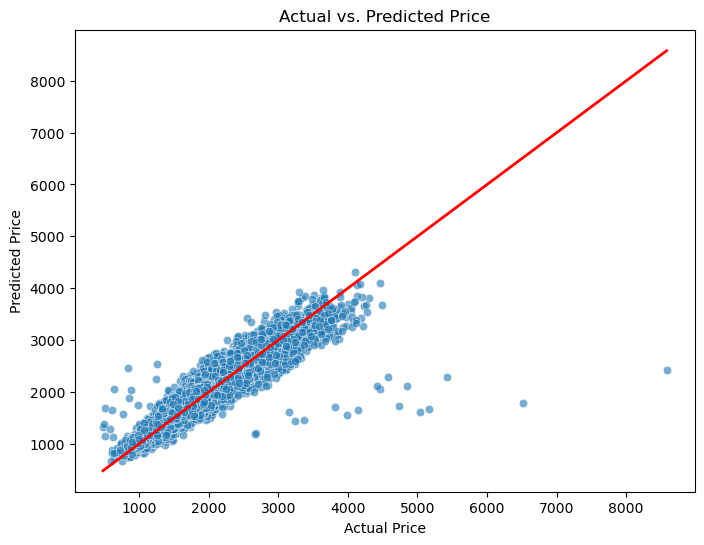

In [851]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df, alpha=0.6)
sns.lineplot(x=[results_df['Actual Price'].min(), results_df['Actual Price'].max()],
             y=[results_df['Actual Price'].min(), results_df['Actual Price'].max()],
             color='red', lw=2)
plt.title("Actual vs. Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
With Stacking, we get a slightly better result 

# Feature Importance and Interpretability

In [866]:
feature_importance = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (XGB):")
print(feature_importance)

feature_importance_top = feature_importance.sort_values(by='Importance', ascending=False).head(16)


Feature Importance (XGB):
                   Feature  Importance
27  total_performance_tier    0.425793
7                   ram_gb    0.213159
40                os_macOS    0.045935
30             brand_Apple    0.041553
5                 gpu_tier    0.037085
..                     ...         ...
53         gpu_brand_Intel    0.000299
67           bluetooth_5.1    0.000273
66           bluetooth_5.0    0.000229
69           bluetooth_5.3    0.000160
28      device_type_Laptop    0.000000

[70 rows x 2 columns]


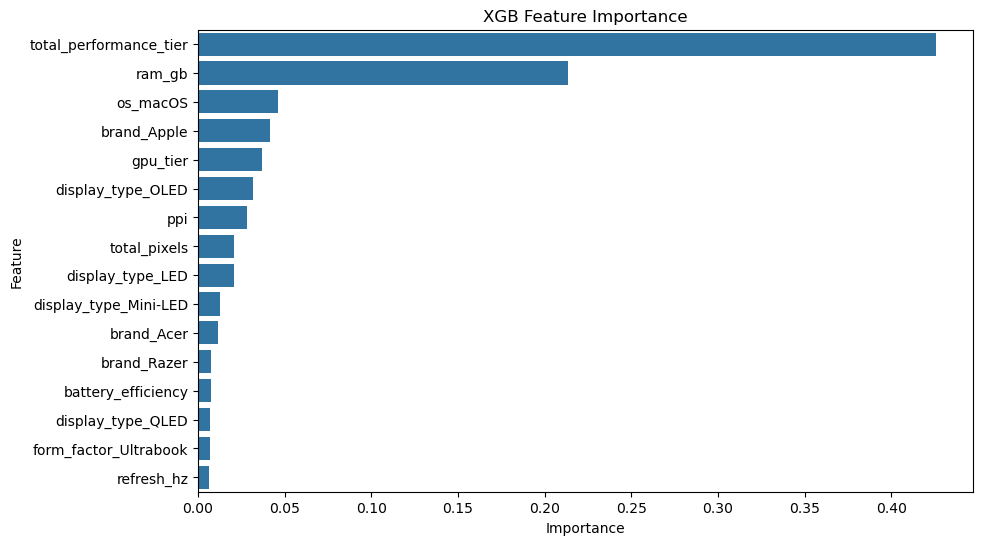

In [875]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_top)
plt.title('XGB Feature Importance')
plt.show()

In [858]:
import shap

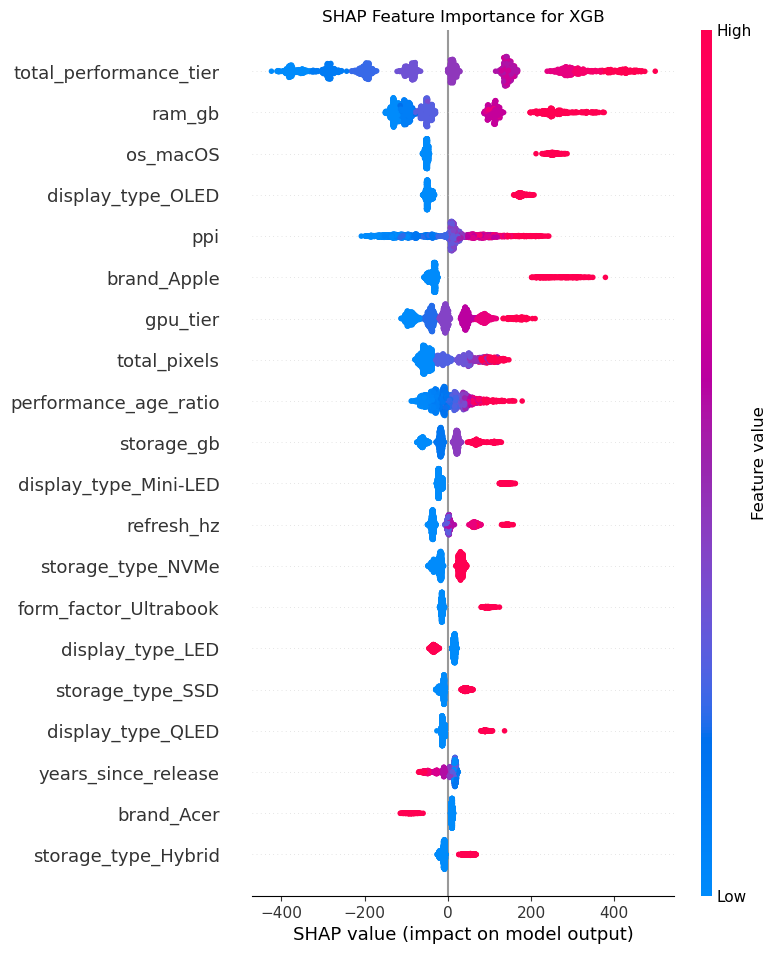

In [874]:
X_test_sample = X_test_encoded.sample(frac=0.1, random_state=42)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_sample)
plt.figure(figsize=(5, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=X_test_encoded.columns, show=False)
plt.title('SHAP Feature Importance for XGB')
plt.show()

Both graphs indicate that a laptop’s overall performance and hardware capacity significantly influence its predicted price. The total performance tier and RAM size stand out as the top contributors, meaning faster processors and more memory strongly increase value. 

Apple products and macOS also add a clear brand premium, placing those laptops consistently at higher price points. Higher-end displays (OLED or Mini-LED) and powerful GPUs further signal premium devices, while lower pixel density or basic panels correspond to more affordable models.

Secondary features, such as battery efficiency, ultrabook form factor, and larger or faster storage, add smaller but still positive effects. Conversely, older models or those with weaker performance tiers slightly reduce the predicted price. Overall

Lets now save the model

In [877]:
import joblib

In [880]:
joblib.dump(
    stacking_model,
    '/Users/joseborges/Kaggle projects/Computers/stacking_model_computers.pkl'
)

['/Users/joseborges/Kaggle projects/Computers/stacking_model_computers.pkl']

In [881]:
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_predicted
})
pred_df.to_csv(
    '/Users/joseborges/Kaggle projects/Computers/predictions.csv',
    index=False
)

# Please upvote my notebook if you find it useful 

![](https://static.wikia.nocookie.net/smiling-friends/images/e/e6/Glep_%28SF%29.png)